In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
date_parser = lambda ts: datetime.strptime(ts, "%y-%m-%dT%H:%M:%SZ")
df = pd.read_csv('./pricing/aviasales_data_t.csv')
df['requested_at'] = pd.to_datetime(df['requested_at'], format="%y-%m-%dT%H:%M:%SZ", errors="coerce")
df['departure_at'] = pd.to_datetime(df['departure_at'], format="%Y-%m-%dT%H:%M:%SZ", errors="coerce")
df['expires_at'] = pd.to_datetime(df['expires_at'], format="%Y-%m-%dT%H:%M:%SZ", errors="coerce")
df['price'] = pd.to_numeric(df["price"], errors="coerce")
df = df.dropna()
df

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
0,MOW,LED,2021-03-06 18:45:00,DP,205,3568.0,2021-03-06 13:24:28,2021-03-06 10:28:54
1,MOW,LED,2021-03-07 04:20:00,U6,9631,2438.0,2021-03-07 04:20:00,2021-03-06 10:28:54
2,MOW,LED,2021-03-08 03:45:00,DP,201,2411.0,2021-03-08 03:45:00,2021-03-06 10:28:54
3,MOW,LED,2021-03-09 05:10:00,DP,207,2618.0,2021-03-09 05:10:00,2021-03-06 10:28:54
4,MOW,LED,2021-03-10 04:30:00,DP,209,2468.0,2021-03-09 06:15:06,2021-03-06 10:28:54
...,...,...,...,...,...,...,...,...
252410,SVX,YKS,2021-04-07 10:30:00,S7,5018,27406.0,2021-04-07 10:30:00,2021-04-07 06:30:04
252411,SVX,YKS,2021-04-17 10:30:00,S7,5018,27406.0,2021-04-07 11:44:16,2021-04-07 06:30:04
252412,SVX,YKS,2021-04-18 15:35:00,R3,468,27050.0,2021-04-07 17:09:57,2021-04-07 06:30:04
252413,SVX,YKS,2021-04-20 16:05:00,S7,5020,27406.0,2021-04-07 10:05:00,2021-04-07 06:30:04


In [4]:
# Duplicates? What we consider to be one of them?
# -- Entries with the same 'departure_at', 'expires_at', 'flight_number', 'price' -- Middle priority, easy to fix
df = df.drop_duplicates(subset=['departure_at', 'expires_at', 'flight_number', 'price'], keep='first')

departure_at
2021-03-07     8979.000000
2021-03-08     9538.400000
2021-03-09    10269.888889
2021-03-10     9808.571429
2021-03-11     8863.000000
2021-03-12     8717.222222
2021-03-13     9736.142857
2021-03-14     8686.235294
2021-03-15     8823.736842
2021-03-16     8705.409091
2021-03-17     8732.454545
2021-03-18     9997.952381
2021-03-19    14125.782609
2021-03-20    12944.781250
2021-03-21    12908.347826
2021-03-22    11468.771429
2021-03-23     9401.240000
2021-03-24     9507.333333
2021-03-25     9795.750000
2021-03-26    10927.375000
2021-03-27     8567.200000
2021-03-28     8713.547619
2021-03-29     9093.279070
2021-03-30     8514.382979
2021-03-31     8568.507937
2021-04-01     9012.310345
2021-04-02     8714.962963
2021-04-03     8665.548387
2021-04-04     8953.212121
2021-04-05     8367.966667
2021-04-06     8236.238095
2021-04-07     8312.580645
Freq: D, Name: price, dtype: float64

[(18693.0, 18724.59214436949),
 Text(0.5, 1.0, 'Average prices for KZN-AER in March')]

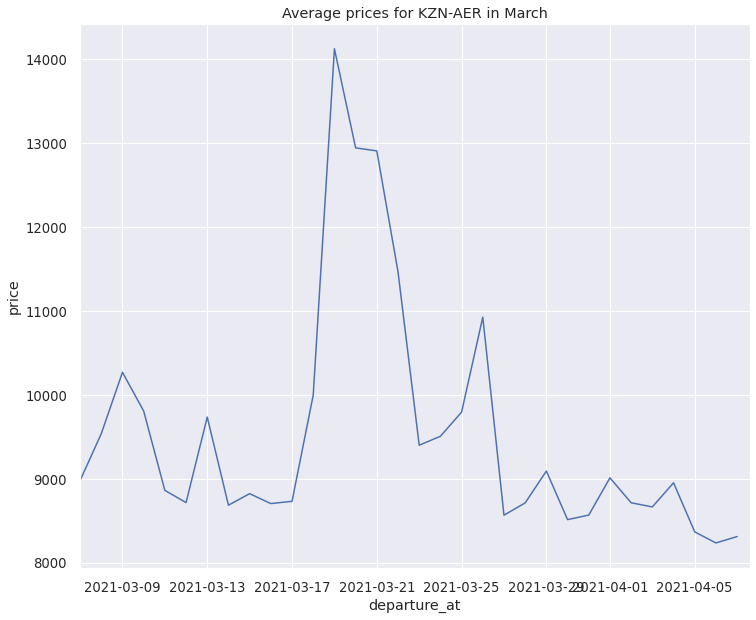

In [27]:
sns.set(context='notebook', font_scale=1.2, rc={'figure.figsize':(12,10)})
#  Avg prices on each day
kzn_soc = df[(df["origin"] == "KZN") & (df["destination"] == "AER") & (df["departure_at"] <= datetime.now()) & (df["departure_at"] >= "2021-03-07")]
#  2021-03-06 is out

# kzn_soc['day'] = kzn_soc['departure_at'].date
kzn_soc_day = kzn_soc.resample('D', on='departure_at')['price'].mean()
# kzn_soc_day = pd.DataFrame(kzn_soc_day)
# kzn_soc_day['departure_at'] = kzn_soc_day.index
display(kzn_soc_day)
kl = sns.lineplot(data=kzn_soc_day)
kl.set(xlim=(datetime.date(datetime(2021,3,7)), datetime.now()), title="Average prices for KZN-AER in March")

departure_at
0     9536.363636
1     8724.668966
2     8781.045752
3     9493.565217
4    10860.747253
5     9991.276786
6     9601.016949
Name: price, dtype: float64

[Text(0.5, 1.0, 'Average prices for KZN-AER by w-day')]

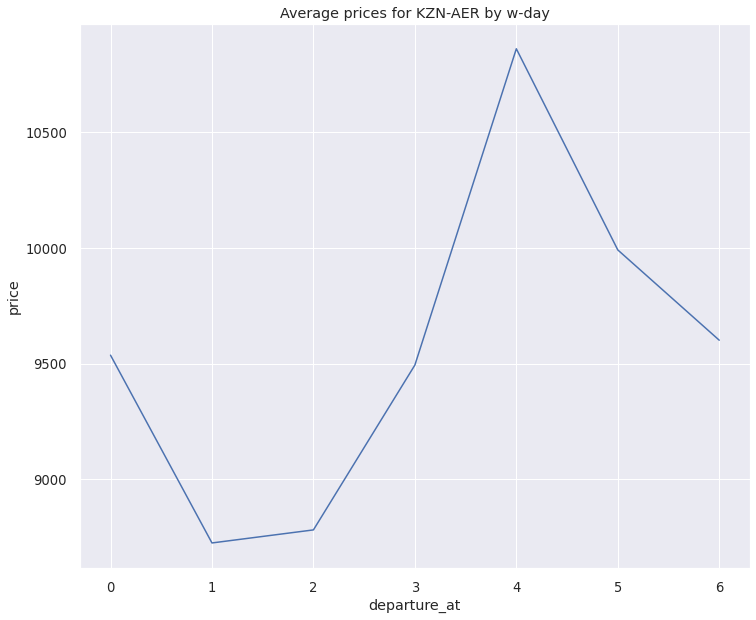

In [28]:
# Avg prices by weekday
kzn_soc_wd = kzn_soc.groupby(kzn_soc['departure_at'].dt.weekday)['price'].mean()
display(kzn_soc_wd)
kwl = sns.lineplot(data=kzn_soc_wd)
kwl.set(title="Average prices for KZN-AER by w-day")

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='price'>)

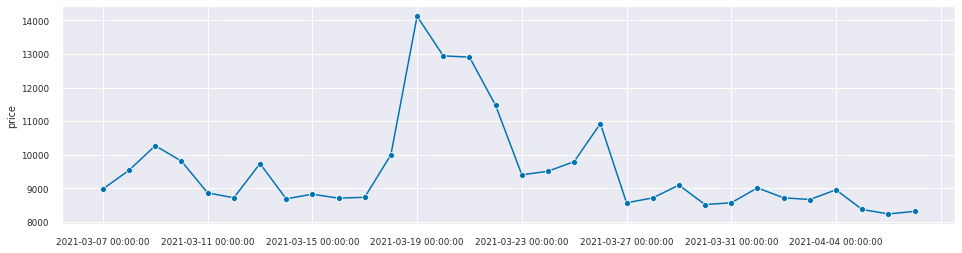

In [29]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA, AutoARIMA

sns.set(font_scale=.8)
y = kzn_soc_day
plot_series(y)

24 8


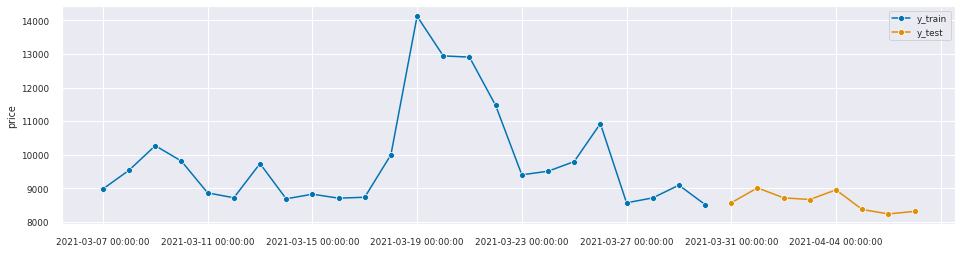

In [30]:
y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

0.03767139025878819

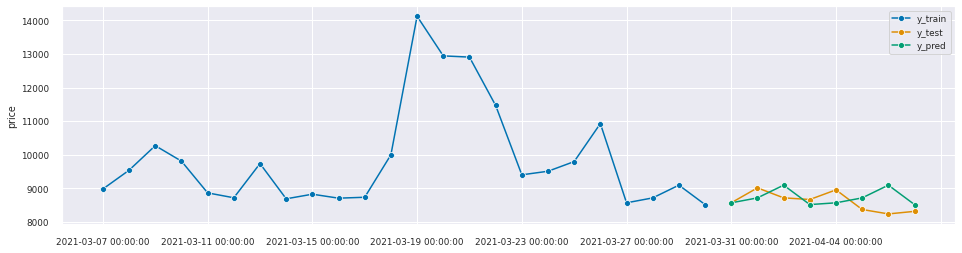

In [33]:
# Naive Forecaster
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=4)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

0.03767139025878819

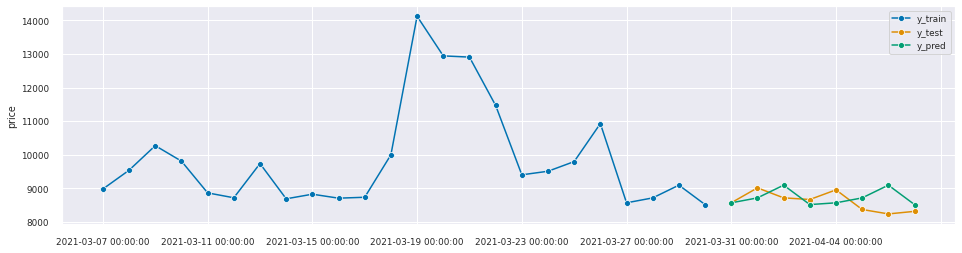

In [36]:
forecaster = AutoARIMA(sp=8, suppress_warnings=True) # 8
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

Тренд установился правильно, но присутствует сдвиг вверх

Let's try different destinations, different models, different statistics

По времени до вылета